# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# CustomLinearRegression
<hr>

In [73]:
class CustomLinearRegression:
  def __init__(self,X,Y,lr=0.01,num_epochs=10000):
    self.X = np.hstack((np.ones((X.shape[0],1)),X))
    self.Y = Y
    self.lr = lr
    self.num_samples = X.shape[0]
    self.num_epochs = num_epochs
    self.num_features = self.X.shape[1]
    self.theta = np.random.randn(self.X.shape[1],1)
    self.losses = []
  def compute_loss(self,y_pred,y_target):
    return np.mean(np.square(y_pred-y_target))
  def predict(self,X):
    return self.X.dot(self.theta)
  def fit(self):
    for epoch in range(self.num_epochs):
      y_pred = self.predict(self.X)
      loss = self.compute_loss(y_pred,self.Y)

      k = 2*(y_pred-self.Y)/self.num_samples
      gradient = self.X.T.dot(k)

      self.theta = self.theta - self.lr*gradient
      self.losses.append(loss)
      if (epoch % 50) == 0:
        print(f"Epoch: {epoch} - Loss: {loss}")
    return {
        'loss':sum(self.losses)/len(self.losses),
        'weight':self.theta
    }

In [18]:
def r2_score(y_pred,y):
  rss = np.sum((y_pred-y)**2)
  tss = np.sum((y-np.mean(y))**2)
  return 1-(rss/tss)

In [19]:
# Câu 4:
y_pred = np . array ([1 , 2 , 3 , 4 , 5])
y = np . array ([1 , 2 , 3 , 4 , 5])
print(r2_score(y_pred,y))
y_pred = np . array ([1 , 2 , 3 , 4 , 5])
y = np . array ([3 , 5 , 5 , 2 , 4])
print(r2_score( y_pred , y ))

1.0
-2.235294117647059


# **Polynomial Features**
<hr>

In [33]:
def create_polynomial_features_v1(X, degree):
    X_poly = X.copy()
    for i in range(2,degree+1):
      X_poly = np.hstack((X_poly,np.power(X,i)))
    return X_poly

array([[1, 1],
       [2, 4],
       [3, 9]])

In [49]:
def create_polynomial_features(X,degree=2):
  X_mem = []
  for X_sub in X.T:
    X_sub = X_sub.T
    X_new = X_sub
    for d in range(2,degree+1):
      X_new = np.c_[(X_new,np.power(X_sub.T,d))]
    X_mem.extend(X_new.T)
  return np.c_[X_mem].T

# **Sales Prediction**
<hr>

In [51]:
df = pd.read_csv("./SalesPrediction.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [53]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [58]:
df = pd.get_dummies(df)

In [59]:
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


In [76]:
# Sales Prediction
class CustomLinearRegression:
  def __init__(self,X,Y,lr=0.01,num_epochs=10000):
    self.X = np.hstack((np.ones((X.shape[0],1)),np.array(X)))
    self.Y = np.array(Y)
    self.lr = lr
    self.num_samples = X.shape[0]
    self.num_epochs = num_epochs
    self.num_features = self.X.shape[1]
    print(self.num_features)
    self.theta = np.random.randn(self.X.shape[1],1)
    self.losses = []
  def compute_loss(self,y_pred,y_target):
    return np.mean(np.square(y_pred-y_target))
  def predict(self,X):
    if X.shape[1] == self.num_features:
      return self.X.dot(self.theta)
    else:
      X = np.hstack((np.ones((X.shape[0],1)),X))
      return X.dot(self.theta)
  def fit(self):
    for epoch in range(self.num_epochs):
      y_pred = self.predict(self.X)
      loss = self.compute_loss(y_pred,self.Y)

      k = 2*(y_pred-self.Y)/self.num_samples
      gradient = self.X.T.dot(k)

      self.theta = self.theta - self.lr*gradient
      self.losses.append(loss)
      if (epoch % 50) == 0:
        print(f"Epoch: {epoch} - Loss: {loss}")
    return {
        "losses":self.losses,
        'loss':sum(self.losses)/len(self.losses),
        'weight':self.theta
    }

In [60]:
# Handle Null values
df = df.fillna(df.mean())

# Get features
X = df[[ "TV" , "Radio" , "Social Media" , "Influencer_Macro" , "Influencer_Mega" , "Influencer_Micro" , "Influencer_Nano"]]
Y = df[['Sales']]

# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [61]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
scaler.mean_[0]

53.990612131916386

In [82]:
# Custom functions
from sklearn.preprocessing import PolynomialFeatures
X_train_poly = create_polynomial_features(X_train_processed,degree=2)
linear_regression = CustomLinearRegression(X_train_poly,Y_train)
result = linear_regression.fit()

15
Epoch: 0 - Loss: 47622.184682375286
Epoch: 50 - Loss: 1353.0547943064328
Epoch: 100 - Loss: 471.7113610943667
Epoch: 150 - Loss: 302.1924463222131
Epoch: 200 - Loss: 232.72478753485626
Epoch: 250 - Loss: 189.36671419473547
Epoch: 300 - Loss: 158.51890066497035
Epoch: 350 - Loss: 135.61674358823058
Epoch: 400 - Loss: 118.2979626859576
Epoch: 450 - Loss: 105.07712018948688
Epoch: 500 - Loss: 94.93260281812545
Epoch: 550 - Loss: 87.12651580516129
Epoch: 600 - Loss: 81.11042066961599
Epoch: 650 - Loss: 76.46985188433682
Epoch: 700 - Loss: 72.88859885401489
Epoch: 750 - Loss: 70.12411930987157
Epoch: 800 - Loss: 67.98982075337035
Epoch: 850 - Loss: 66.34191597614446
Epoch: 900 - Loss: 65.06950157633021
Epoch: 950 - Loss: 64.08699401831021
Epoch: 1000 - Loss: 63.32833035829483
Epoch: 1050 - Loss: 62.742507855608466
Epoch: 1100 - Loss: 62.2901473140295
Epoch: 1150 - Loss: 61.94084259970263
Epoch: 1200 - Loss: 61.67111537768703
Epoch: 1250 - Loss: 61.46283639323568
Epoch: 1300 - Loss: 61.30

<function matplotlib.pyplot.show(close=None, block=None)>

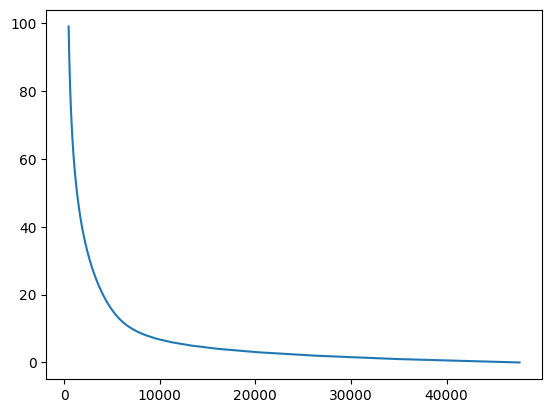

In [83]:
plt.plot(result['losses'][:100],list(range(100)))
plt.show

In [81]:
# Sklearn
# import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
# Create Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# Training
poly_model = LinearRegression()
poly_model.fit(X_train_poly,Y_train)
# Evaluation
y_pred = poly_model.predict(X_test_poly)
print(r2_score(Y_test,y_pred))

0.9948321448932432
